In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')



In [3]:
df

,STTN_NM,MSR_DT,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),전운량(10분위),PM25,PM10,O3,CO,SO2,NO2
0,창원,2021010101,0.253165,0.000000,0.095890,0.673469,0.0,0.006024,0.0,0.040359,0.016602,0.067797,0.114286,0.083333,0.277778
1,창원,2021010102,0.235081,0.000000,0.123288,0.602041,0.0,0.006024,0.0,0.040359,0.016602,0.135593,0.057143,0.083333,0.133333
2,창원,2021010103,0.224231,0.000000,0.082192,0.571429,0.0,0.006024,0.0,0.067265,0.016602,0.118644,0.085714,0.083333,0.144444
3,창원,2021010104,0.215190,0.000000,0.054795,0.571429,0.0,0.006024,0.0,0.062780,0.018555,0.112994,0.057143,0.083333,0.144444
4,창원,2021010105,0.211573,0.000000,0.041096,0.602041,0.0,0.006024,0.0,0.044843,0.015625,0.096045,0.085714,0.083333,0.155556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301381,남해,2023123019,0.439421,0.004386,0.013699,0.918367,0.0,0.000000,1.0,0.318386,0.071289,0.214689,0.242857,0.104167,0.222222
301382,남해,2023123020,0.428571,0.007456,0.027397,0.948980,0.0,0.000000,0.3,0.282511,0.060547,0.186441,0.214286,0.095833,0.188889
301383,남해,2023123021,0.433996,0.010526,0.054795,0.928571,0.0,0.000000,1.0,0.278027,0.061523,0.175141,0.240000,0.108333,0.166667
301384,남해,2023123022,0.430380,0.010526,0.089041,0.897959,0.0,0.000000,0.8,0.264574,0.063477,0.152542,0.297143,0.095833,0.166667


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')

# 'MSR_DT'를 datetime 형식으로 변환
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H')

# 'STTN_NM'을 dummy 변수로 변환
df = pd.get_dummies(df, columns=['STTN_NM'])

# 예측할 컬럼 설정 (예: PM10)
target_col = 'PM10'

# 입력 데이터와 출력 데이터 분리
X = df.drop(['MSR_DT', target_col], axis=1).values
y = df[target_col].values

# 데이터 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


In [8]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [9]:
# RandomForest 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# 예측 수행
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 원래 스케일로 되돌리기
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_train_inverse = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_inverse = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()


Train MSE: 0.00, Train MAE: 0.00
Test MSE: 0.00, Test MAE: 0.01


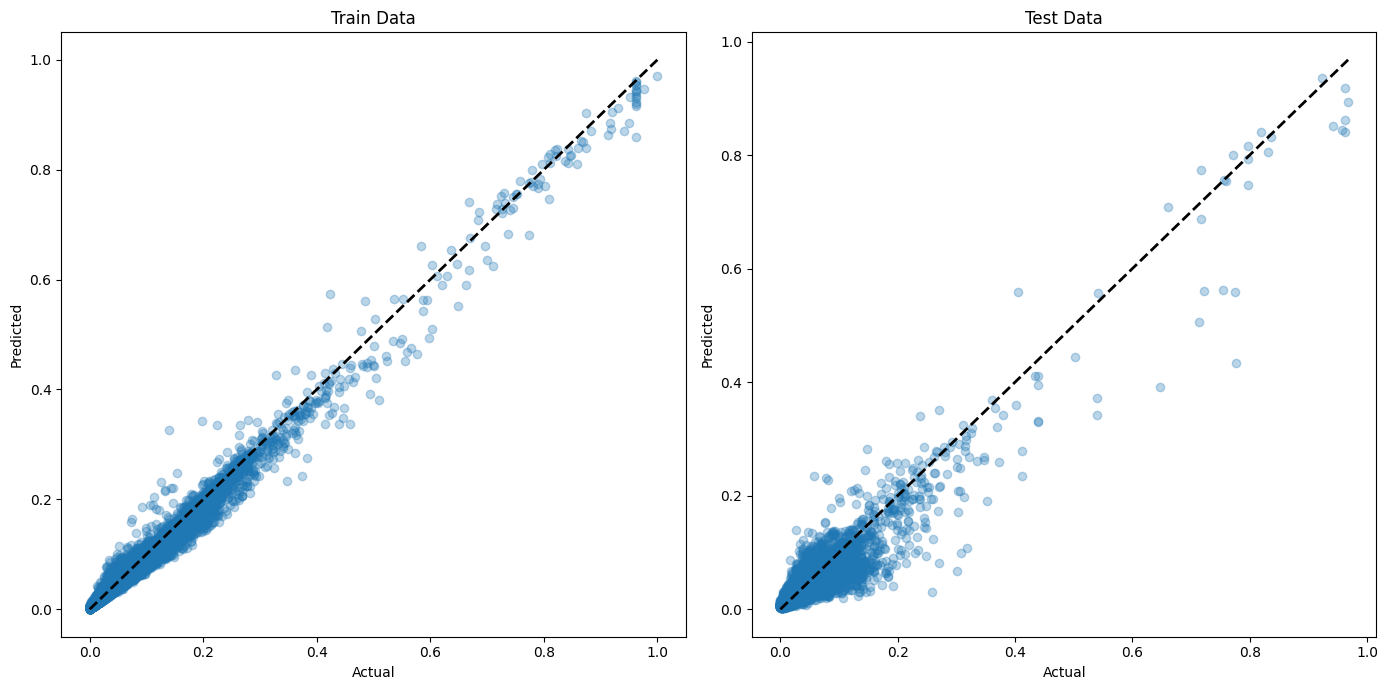

In [15]:
# 평가 지표 계산
mse_train = mean_squared_error(y_train_inverse, y_pred_train_inverse)
mae_train = mean_absolute_error(y_train_inverse, y_pred_train_inverse)
mse_test = mean_squared_error(y_test_inverse, y_pred_test_inverse)
mae_test = mean_absolute_error(y_test_inverse, y_pred_test_inverse)

print(f'Train MSE: {mse_train:.2f}, Train MAE: {mae_train:.2f}')
print(f'Test MSE: {mse_test:.2f}, Test MAE: {mae_test:.2f}')

# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_train_inverse, y_pred_train_inverse, alpha=0.3)
plt.plot([y_train_inverse.min(), y_train_inverse.max()], [y_train_inverse.min(), y_train_inverse.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data')

plt.subplot(1, 2, 2)
plt.scatter(y_test_inverse, y_pred_test_inverse, alpha=0.3)
plt.plot([y_test_inverse.min(), y_test_inverse.max()], [y_test_inverse.min(), y_test_inverse.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# 데이터 로드 및 전처리
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')

# MSR_DT를 날짜 형식으로 변환
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H')

# 문자열 열을 원-핫 인코딩으로 변환
df = pd.get_dummies(df, columns=['STTN_NM'])

# Feature와 Target 변수 설정
target_col = 'PM10'
X = df.drop(['MSR_DT', target_col], axis=1)
y = df[target_col]

# 데이터 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 모델 훈련
model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
model.fit(X_train, y_train.ravel())

# 예측
y_pred_train_scaled = model.predict(X_train)
y_pred_test_scaled = model.predict(X_test)

# 예측값 역변환
y_train_inverse = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# 실제 값 역변환
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 평가 지표 계산
mse_train = mean_squared_error(y_train_actual, y_train_inverse)
mae_train = mean_absolute_error(y_train_actual, y_train_inverse)
mse_test = mean_squared_error(y_test_actual, y_test_inverse)
mae_test = mean_absolute_error(y_test_actual, y_test_inverse)

print(f'Train MSE: {mse_train:.2f}, Train MAE: {mae_train:.2f}')
print(f'Test MSE: {mse_test:.2f}, Test MAE: {mae_test:.2f}')

# 시각화에 사용할 인덱스 생성
test_dates = df['MSR_DT'].iloc[X_test.index]

# 실제 값과 예측 값 시각화
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual PM10')
plt.plot(test_dates, y_test_inverse, label='Predicted PM10', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10 Levels')
plt.show()

# 잔차 플롯
residuals = y_test_actual - y_test_inverse
plt.figure(figsize=(14, 7))
plt.plot(test_dates, residuals, label='Residuals')
plt.hlines(0, test_dates.min(), test_dates.max(), colors='r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Train MSE: 0.00, Train MAE: 0.01
Test MSE: 0.00, Test MAE: 0.01


AttributeError: 'numpy.ndarray' object has no attribute 'index'